#Importing Necessary Library#

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

#Importing Dataset #

In [5]:
ipl=pd.read_csv('/content/ipl_data.csv')

In [6]:
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


#Pre-processing Data#

In [7]:
sf = ipl.drop(['mid','date','runs','wickets','overs','runs_last_5','wickets_last_5','striker','non-striker'], axis=1)

In [8]:
#Splitting Data into Dependent and Independent Data
X=sf.drop(['total'],axis=1)
y=sf['total']

In [9]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
venue_encoder=LabelEncoder()
batting_team_encoder=LabelEncoder()
bowling_team_encoder=LabelEncoder()
striker_encoder=LabelEncoder()
bowler_encoder=LabelEncoder()

#Fit and transform categorical features into label encoding
X['venue']=venue_encoder.fit_transform(X['venue'])
X['bat_team']=batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team']=bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman']=striker_encoder.fit_transform(X['batsman'])
X['bowler']=bowler_encoder.fit_transform(X['bowler'])

In [10]:
#Train_Test_Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [11]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# # Fit the scaler on the training data and transform both training and testing data
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define Neural Networks#

In [12]:
#Define Neural Network Model
model= keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(1,activation='linear')])

#Compile the model with Huber Loss
huber_loss=tf.keras.losses.Huber(delta=1)
model.compile(optimizer='adam',loss=huber_loss)

# Model Training#

In [14]:
model.fit(X_train_scaled,y_train,epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.5497 - val_loss: 22.0627
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 22.0834 - val_loss: 22.2731
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.1072 - val_loss: 21.9309
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 22.0460 - val_loss: 22.0668
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 21.8845 - val_loss: 21.9676
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 21.8757 - val_loss: 22.0946
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 21.8198 - val_loss: 21.6203
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 21.7440 - val_loss: 21.4758
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 21.4255 - val_loss: 21.4235
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 21.6157 - val_loss: 21.5644
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 21.4657 - val_loss: 21.2507
Epoch 12/50
832/832 ━━━━━━━━

#After model training storing the Training and Validation Loss#

<Axes: >

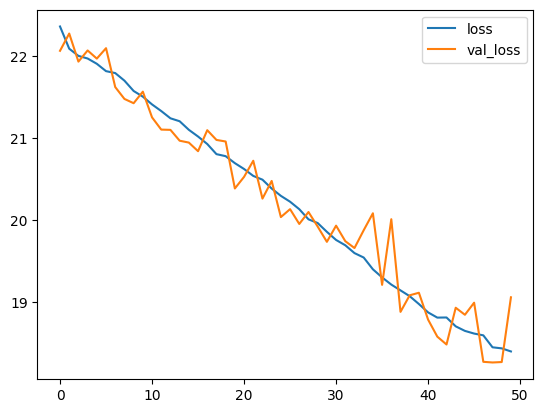

In [16]:
model_losses=pd.DataFrame(model.history.history)
model_losses.plot()

#Model Evaluation#

In [17]:
prediction=model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test,prediction)

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


19.548730850219727

In [22]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue=widgets.Dropdown(options=sf['venue'].unique().tolist(), description='Select Venue:')
batting_team=widgets.Dropdown(options=sf['bat_team'].unique().tolist(),description='Select Batting Team:')
bowling_team=widgets.Dropdown(options=sf['bowl_team'].unique().tolist(),description='Select Bowling Team:')
striker=widgets.Dropdown(options=sf['batsman'].unique().tolist(),description='Select Striker:')
bowler=widgets.Dropdown(options=sf['bowler'].unique().tolist(),description='Select Bowler:')

predict_button= widgets.Button(description='Predict Score')

def predict_score(b):
  with output:
    clear_output()

    decoded_venue=venue_encoder.transform([venue.value])
    decoded_batting_team=batting_team_encoder.transorm([batting_team.value])
    decoded_bowling_team=bowling_team_encoder.tranform([bowling_team.value])
    decoded_striker=sriker_encoder.transform(['striker.value'])
    decoded_bowler=bowler_encoder.transform(['bowler.value'])

    input=np.array([decoded_venue, decoded_batting_team, decoded_bowling_team, decoded_striker, decoded_bowler])
    input.reshape(1,5)
    input=scaler.transform(input)

    predicted_score=model.predicted(input)
    predicted_score=int(predicted_score[0,0])

    print(predicted_score)



In [24]:
predict_button.on_click(predict_score)
output= widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()